# NYC Janurary Tempetures: Prediction Model
### Author: Clayton Seabaugh
[Github Project Repository](https://github.com/ClaytonSeabaughGH/datafun-07-ml)

This project uses Time Seires and Simple Linear Regression to predicti the average high temperature in New York City for January using data from 1895 - 2018. 

In [32]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

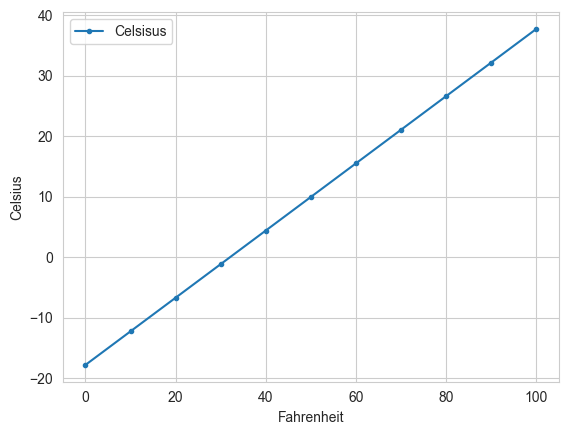

In [33]:
# Formula to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)
    
# Store each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create DataFrame from list
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsisus'])

# Plot DataFrame into line graph
axes = temps_df.plot(x='Fahrenheit', y='Celsisus', style = '.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 Prediction

### Section 1: Data Acquisition

In [34]:
# Read in NYC Tmeperature data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Data Inspection

In [35]:
# Inspect first 5 rows
nyc.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [36]:
# Inspect last 5 rows
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [37]:
# Change Value column head to Temperature
nyc.columns=['Date','Temperature','Anomaly']

# Inspect the change
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [38]:
# Check data type of date column
nyc.Date.dtype

dtype('int64')

In [39]:
# Truncate to remove last 2 digits
nyc.Date = nyc.Date.floordiv(100)

# Inspect change
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [40]:
# Set precision to show decimal points .00
pd.set_option('display.precision', 2)

# Calculate basi descriptive statistics
nyc.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [41]:
# Create linear regression function
linear_regression = stats.linregress(x=nyc.Date,y=nyc.Temperature)

# Calculates line's slope
linear_regression.slope


np.float64(0.014771361132966163)

In [42]:
# Calculates line's intercept
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6: Predict

In [43]:
# Use y = mx+b to predict average temps for 2019
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

In [44]:
# Use y = mx+b to predict average temps for 2019
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7: Visualizations

(10.0, 70.0)

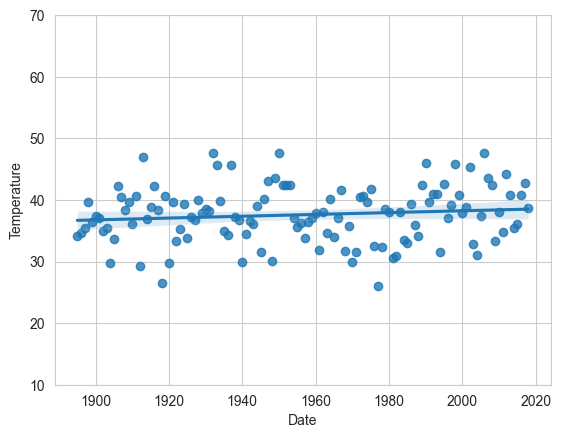

In [45]:
# Create scatter plot
sns.set_style('whitegrid')

# set axes
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Limit Y axis
axes.set_ylim(10,70)